<h1 align="center"><font color="yellow">Pytorch: Introdução</font></h1>

<font color="yellow">Data Scientist.: PhD.Eddy Giusepe Chirinos Isidro</font>

In [ ]:
%conda install requests,matplotlib --yes

In [1]:
%load_ext watermark 
%watermark -v -p numpy,pandas,matplotlib,requests,torch

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.13.2

numpy     : 1.24.3
pandas    : 2.0.1
matplotlib: 3.7.1
requests  : 2.31.0
torch     : 2.0.1



In [2]:
import torch

print(torch.__version__)

2.0.1+cu117


Da mesma maneira que em `NumPy` o objeto principal é o `ndarray`, em `Pytorch` o objeto principal é o `Tensor`.Podemos definir um Tensor de maneira similar a como definimos um `array`, incluso podemos inicializar Tensores a partir de arrays.

In [3]:
# Matriz de zeros, 5 filas y 3 colunas
x = torch.zeros(5, 3)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [4]:
# Tensor com valores aleatórios
x = torch.randn(5, 3, 2) # Três dimensões
x

tensor([[[ 0.8140, -0.4017],
         [-0.5626,  0.4431],
         [-0.9916, -0.3882]],

        [[-2.4016, -0.4374],
         [-0.7299, -1.2057],
         [ 0.3628,  2.0732]],

        [[ 0.3651,  0.0127],
         [-0.8149,  1.1671],
         [-0.1458, -0.9957]],

        [[-0.2868,  0.9642],
         [ 0.5141, -0.7969],
         [ 0.0847, -0.7401]],

        [[ 0.2627, -1.0439],
         [ 0.9999,  0.3457],
         [-0.3190, -0.4115]]])

In [5]:
# Tensor a partir da lista 
x = torch.tensor([[1, 2, 3],[4, 5, 6]])
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [6]:
import numpy as np

# Tensor a partir de um array numpy

a = np.array([[1, 2, 3],[4, 5, 6]])
x = torch.from_numpy(a)
x

tensor([[1, 2, 3],
        [4, 5, 6]])

<font color="orange">Também podemos fazer operações:</font>

In [7]:
# Definimos dois tensores quaisquer

x = torch.randn(3, 3)
y = torch.randn(3, 3)

In [8]:
x

tensor([[-1.1333,  1.0987,  0.0331],
        [-0.6437,  0.1099,  0.9999],
        [-0.0128,  2.2600, -1.0563]])

In [9]:
y

tensor([[-0.4598, -0.2686, -0.9413],
        [-1.8110, -0.6192, -0.6662],
        [ 1.3519,  0.3514, -0.2391]])

In [10]:
x + y

tensor([[-1.5931,  0.8301, -0.9082],
        [-2.4547, -0.5093,  0.3337],
        [ 1.3391,  2.6114, -1.2955]])

In [11]:
x - y

tensor([[-0.6735,  1.3673,  0.9745],
        [ 1.1673,  0.7291,  1.6662],
        [-1.3648,  1.9086, -0.8172]])

In [12]:
# Indexado

# primera fila

x[0]

tensor([-1.1333,  1.0987,  0.0331])

In [13]:
# Segunda fila
x[1]

tensor([-0.6437,  0.1099,  0.9999])

In [14]:
# Primeira fila, primeira columna

x[0, 0]

tensor(-1.1333)

In [15]:
# Primeira fila

x[0, :]

tensor([-1.1333,  1.0987,  0.0331])

In [16]:
x

tensor([[-1.1333,  1.0987,  0.0331],
        [-0.6437,  0.1099,  0.9999],
        [-0.0128,  2.2600, -1.0563]])

In [17]:
# Troceado

x[:-1, 1:]

tensor([[1.0987, 0.0331],
        [0.1099, 0.9999]])

In [18]:
x.shape

torch.Size([3, 3])

In [19]:
# añadimos una dimensión extra

x.view(1, 3, 3).shape

torch.Size([1, 3, 3])

In [20]:
x

tensor([[-1.1333,  1.0987,  0.0331],
        [-0.6437,  0.1099,  0.9999],
        [-0.0128,  2.2600, -1.0563]])

In [21]:
# Esticamos em uma só dimensão

x.view(9).shape

torch.Size([9])

In [22]:
x

tensor([[-1.1333,  1.0987,  0.0331],
        [-0.6437,  0.1099,  0.9999],
        [-0.0128,  2.2600, -1.0563]])

In [23]:
# Usamos -1 para asignar todos los valores restantes a una dimensión

x.view(-1).shape

torch.Size([9])

Podemos transformar um `Tensor` em um `array` com a função `NumPy`.

In [24]:
x.numpy()

array([[-1.1333096 ,  1.0986823 ,  0.03312506],
       [-0.64367604,  0.10992441,  0.99993604],
       [-0.01284594,  2.2599814 , -1.0563228 ]], dtype=float32)

# <font color="red">Autograd</font>

A qual nos proporciona a possibilidade de calcular DERIVADAS de maneira automática com respeito a qualquer `Tensor`. Pytorch vai construindo de maneira dinamica um `Grafo computacional`. Já veremos como aplicar, também, `backpropagation` (que é simplesmente a Regra da Cadeia da Derivada) no Grafo.

In [25]:
x = torch.tensor(1., requires_grad=True) # Tem que ser TRUE para poder calcular derivadas delas
y = torch.tensor(2., requires_grad=True)
p = x + y


z = torch.tensor(3., requires_grad=True)
g = p * z

In [26]:
x

tensor(1., requires_grad=True)

O Grafo seria o seguinte:

![](https://www.tutorialspoint.com/python_deep_learning/images/computational_graph_equation2.jpg)

<font color="orange">Se queremos calcular as derivadas de `g` com respeito a `x`, `y` e `z`, é tão fácil como chamar à função `backward`:</font>

In [27]:
g.backward()


<font color="orange">Neste ponto, `Pytorch` a aplicado o algoritmo de `backpropagation` acima do `Grafo computacional`, calculando todas as Derivadas:</font>

$$\frac{dg}{dz} = p$$

In [28]:
z.grad

tensor(3.)

$$ \frac{dg}{dx} = \frac{dg}{dp} \frac{dp}{dx} = z $$

In [29]:
x.grad

tensor(3.)

$$ \frac{dg}{dy} = \frac{dg}{dp} \frac{dp}{dy} = z $$

In [30]:
y.grad

tensor(3.)

In [31]:
import torch

# Cria um tensor
x = torch.tensor([2.0], requires_grad=True)

# Realiza uma operação com o tensor
y = x**2

# Realiza o backpropagation
y.backward()

# Imprime o gradiente do tensor x (Pelo que Eu entendi: Obtemos o valor da Derivada de `y` em relação a `x`, que é 4.0, um tensor.)
print(x.grad)


tensor([4.])


<font color="orange">Como podemos observar, o `Grafo computacional` é uma ferramenta extraordinária para desenhar `Redes Neurais` de complexidade arbitrária. Com uma simples função, graças ao algoritmo de `Backpropagation`, podemos calcular as Derivadas de maneira simples (**cada nó que representa uma operação só necessita calcular sua própria derivada de maneira local**) e otimizar o modelo como nosso algoritmo de gradiente preferido.</font>

# Usando GPU

In [32]:
# Comprovando se temos GPU
torch.cuda.is_available()

True

In [33]:
import torch

if torch.cuda.is_available():
    device = torch.cuda.get_device_name(0)
    print("Nome da GPU:", device)
    print("Memória Total:", torch.cuda.get_device_properties(0).total_memory)
    print("Multiprocessadores:", torch.cuda.get_device_properties(0).multi_processor_count)
    #print("Clock da GPU:", torch.cuda.get_device_properties(0).clock_rate)
else:
    print("GPU não está disponível")



Nome da GPU: NVIDIA GeForce MX450
Memória Total: 1961295872
Multiprocessadores: 14


In [34]:
x = torch.randn(10000,10000)
y = torch.randn(10000,10000)

%time z = x*y

CPU times: user 118 ms, sys: 258 ms, total: 376 ms
Wall time: 100 ms


In [35]:
x = torch.randn(10000,10000).to('cuda') # ou x = torch.randn(10000,10000).cuda()
y = torch.randn(10000,10000).to('cuda')

%time z = x*y

CPU times: user 427 µs, sys: 12.3 ms, total: 12.7 ms
Wall time: 14.4 ms


In [36]:
# Também pode usar as seguintes formas:
device = torch.device("cuda")

x = torch.randn((10000,10000), device="cuda")
x = x.cuda()
x = x.to("cuda")
x = x.to(device)


OutOfMemoryError: CUDA out of memory. Tried to allocate 382.00 MiB (GPU 0; 1.83 GiB total capacity; 1.12 GiB already allocated; 300.69 MiB free; 1.12 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

<font color="orange">E para voltar a `cpu`, fazemos:</font>

In [ ]:
device = torch.device("cpu")

x = x.cpu()
x = x.to("cpu")
x = x.to(device)

# Re-implementando a nossa `MLP`

In [ ]:
%conda install scikit-learn --yes

In [1]:
%load_ext watermark 
%watermark -v -p numpy,pandas,matplotlib,requests,torch,scikit-learn

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.13.2

numpy       : 1.24.3
pandas      : 2.0.1
matplotlib  : 3.7.1
requests    : 2.31.0
torch       : 2.0.1
scikit-learn: 1.2.2



In [22]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X, Y = mnist["data"], mnist["target"]

X.shape, Y.shape


/home/eddygiusepe/miniconda3/envs/LightningAI/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


((70000, 784), (70000,))

In [23]:
type(X)

pandas.core.frame.DataFrame

In [24]:
type(Y)

pandas.core.series.Series

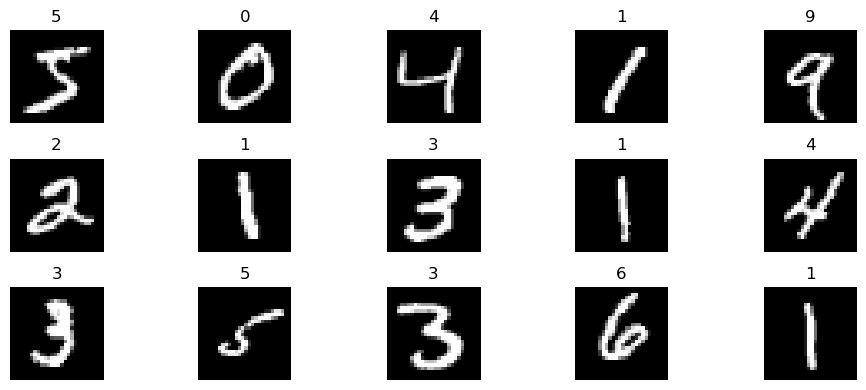

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Converter o DataFrame para um array NumPy
#X = X.to_numpy()

# Converter as imagens em matrizes 2D
images = X.reshape((-1, 28, 28))

# Visualizar as primeiras 10 imagens
fig, axes = plt.subplots(3, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(Y[i])
plt.tight_layout()
plt.show()

In [33]:
# Normalizando os Dados:

X_train, X_test, y_train, y_test = X[:60000] / 255., X[60000:] / 255., Y[:60000].astype(int), Y[60000:].astype(int)


In [35]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [39]:
import torch

# Funça de perda e Derivada:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1, keepdims=True)


def cross_entropy(output, target):
    logits = output[torch.arange(len(output)), target]
    loss = - logits + torch.log(torch.sum(torch.exp(output), axis=-1))
    loss = loss.mean()
    return loss


In [45]:
D_in, H, D_out = 784, 100, 10

# Pesos da MLP (copiamos en GPU)
w1 = torch.tensor(np.random.normal(loc=0.0, 
          scale = np.sqrt(2/(D_in+H)), 
          size = (D_in, H)), requires_grad=True, device="cuda", dtype=torch.float)
b1 = torch.zeros(H, requires_grad=True, device="cuda", dtype=torch.float)

w2 = torch.tensor(np.random.normal(loc=0.0, 
          scale = np.sqrt(2/(D_out+H)), 
          size = (H, D_out)), requires_grad=True, device="cuda", dtype=torch.float)
b2 = torch.zeros(D_out, requires_grad=True, device="cuda", dtype=torch.float)

# Convertemos Dados a Tensores e copiamos para gpu
X_t = torch.from_numpy(X_train).float().cuda()
Y_t = torch.from_numpy(y_train.values).long().cuda()

epochs = 2000
lr = 0.8
log_each = 10
l = []
for e in range(1, epochs+1): 
    
    # Forward
    h = X_t.mm(w1) + b1
    h_relu = h.clamp(min=0) # relu
    y_pred = h_relu.mm(w2) + b2

    # Loss
    loss = cross_entropy(y_pred, Y_t)
    l.append(loss.item())

    # Backprop (calculamos todos os Gradientes automaticamente)
    loss.backward()

    with torch.no_grad():
        # update pesos
        w1 -= lr * w1.grad
        b1 -= lr * b1.grad
        w2 -= lr * w2.grad  
        b2 -= lr * b2.grad
        
        # ponemos a cero los gradientes para la siguiente iteración
        # (sino acumularíamos gradientes)
        w1.grad.zero_()
        w2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()
    
    if not e % log_each:
        print(f"Epoch {e}/{epochs} Loss {np.mean(l):.5f}")
        

Epoch 10/2000 Loss 1.64741
Epoch 20/2000 Loss 1.30877
Epoch 30/2000 Loss 1.09429
Epoch 40/2000 Loss 0.92769
Epoch 50/2000 Loss 0.81749
Epoch 60/2000 Loss 0.73689
Epoch 70/2000 Loss 0.67205
Epoch 80/2000 Loss 0.62138
Epoch 90/2000 Loss 0.58051
Epoch 100/2000 Loss 0.54677
Epoch 110/2000 Loss 0.51852
Epoch 120/2000 Loss 0.49477
Epoch 130/2000 Loss 0.47394
Epoch 140/2000 Loss 0.45513
Epoch 150/2000 Loss 0.43830
Epoch 160/2000 Loss 0.42318
Epoch 170/2000 Loss 0.40950
Epoch 180/2000 Loss 0.39706
Epoch 190/2000 Loss 0.38567
Epoch 200/2000 Loss 0.37519
Epoch 210/2000 Loss 0.36551
Epoch 220/2000 Loss 0.35652
Epoch 230/2000 Loss 0.34815
Epoch 240/2000 Loss 0.34033
Epoch 250/2000 Loss 0.33299
Epoch 260/2000 Loss 0.32610
Epoch 270/2000 Loss 0.31959
Epoch 280/2000 Loss 0.31345
Epoch 290/2000 Loss 0.30763
Epoch 300/2000 Loss 0.30210
Epoch 310/2000 Loss 0.29685
Epoch 320/2000 Loss 0.29184
Epoch 330/2000 Loss 0.28707
Epoch 340/2000 Loss 0.28250
Epoch 350/2000 Loss 0.27814
Epoch 360/2000 Loss 0.27395
E

In [46]:
def evaluate(x):
    h = x.mm(w1) + b1
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2) + b2
    y_probas = softmax(y_pred)
    return torch.argmax(y_probas, axis=1)


In [47]:
from sklearn.metrics import accuracy_score

y_pred = evaluate(torch.from_numpy(X_test).float().cuda())
accuracy_score(y_test, y_pred.cpu().numpy())


0.9776

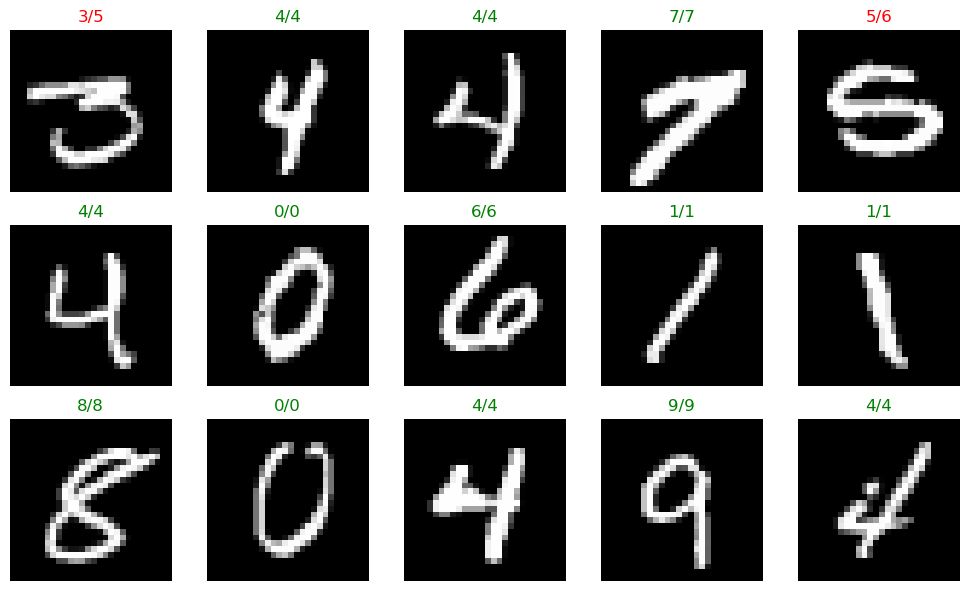

In [82]:
import random
import matplotlib.pyplot as plt

r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))

for i in range(r * c):
    ix = random.randint(0, len(y_test) - 1)
    img = X_test[ix]
    y_pred = evaluate(torch.tensor([img]).float().cuda())[0].item()
    plt.subplot(r, c, i + 1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis("off")
    plt.title(f"{y_test.iloc[ix]}/{y_pred}", color="green" if y_test.iloc[ix] == y_pred else "red")

plt.tight_layout()
plt.show()

